# A1. Prior PDFs

## A1.1. Notebook setup

In [1]:
import warnings
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import emcee
import corner

plt.style.use('../thermal-gs.mplstyle')
warnings.filterwarnings('ignore')

A1.2. Generate data

In [2]:
def gen_gauss(x, mu, sigma, s):
    return np.exp(-np.abs((x - mu) / sigma)**s)

def inv_gamma(x, a, b):
    return x**(-a - 1) * np.exp(-b / x)

x_gauss = np.linspace(-6, 6, 1200)
x_inv_gamma = np.linspace(0, 5, 500)

gauss_1 = gen_gauss(x_gauss, 0, 1, 2)
gauss_2 = gen_gauss(x_gauss, 0, 1, 10)
gauss_3 = gen_gauss(x_gauss, 0, 2, 10)
gauss_4 = gen_gauss(x_gauss, 0, 3, 2)

inv_gamma_1 = inv_gamma(x_inv_gamma, 1, 1)
inv_gamma_2 = inv_gamma(x_inv_gamma, 2, 1)
inv_gamma_3 = inv_gamma(x_inv_gamma, 2, 3)
inv_gamma_4 = inv_gamma(x_inv_gamma, 3, 2)

## A1.3. Plot

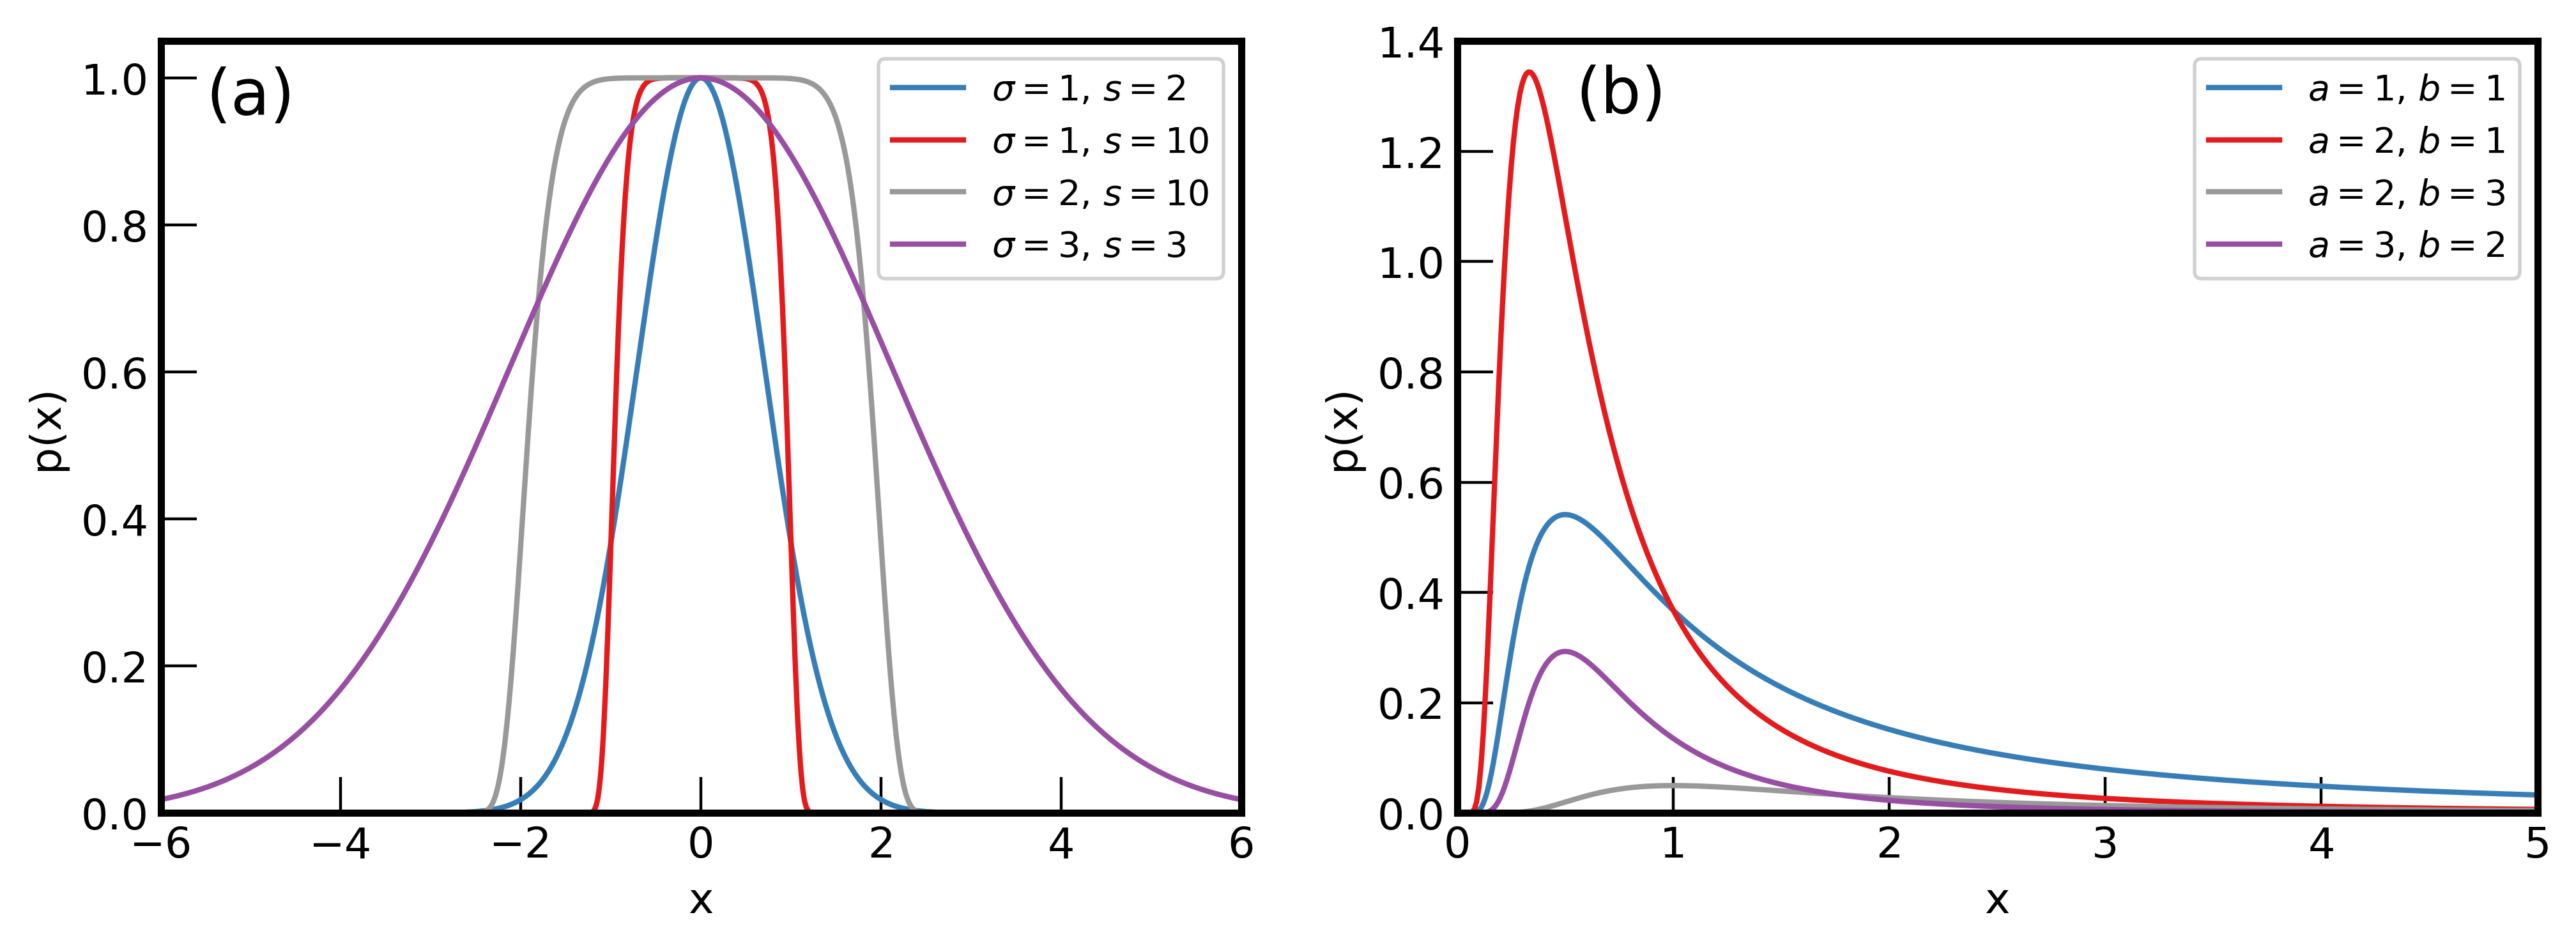

In [3]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(x_gauss, gauss_1, label=r'$\sigma=1$, $s=2$')
ax[0].plot(x_gauss, gauss_2, label=r'$\sigma=1$, $s=10$')
ax[0].plot(x_gauss, gauss_3, label=r'$\sigma=2$, $s=10$', color='C5')
ax[0].plot(x_gauss, gauss_4, label=r'$\sigma=3$, $s=3$', color='C6')
ax[0].set_xlim(-6, 6)
ax[0].set_ylim(0, 1.05)
ax[0].set_xlabel('x')
ax[0].set_ylabel('p(x)')
ax[0].legend(loc='upper right')

ax[1].plot(x_inv_gamma, inv_gamma_1, label=r'$a=1$, $b=1$')
ax[1].plot(x_inv_gamma, inv_gamma_2, label=r'$a=2$, $b=1$')
ax[1].plot(x_inv_gamma, inv_gamma_3, label=r'$a=2$, $b=3$', color='C5')
ax[1].plot(x_inv_gamma, inv_gamma_4, label=r'$a=3$, $b=2$', color='C6')
ax[1].set_xlim(0, 5)
ax[1].set_ylim(0, 1.4)
ax[1].set_xlabel('x')
ax[1].set_ylabel('p(x)')
ax[1].legend(loc='upper right')

ax[0].text(-5.5, 0.95, '(a)', fontsize=18) 
ax[1].text(0.55, 1.27, '(b)', fontsize=18) 

fig.set_facecolor('white')
plt.savefig('../figures/priors.png', bbox_inches='tight')
plt.savefig('../figures/priors.pdf', bbox_inches='tight')
plt.show()